In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Cargar los datos
# -------------------------
df_raw = pd.read_csv('../data/train.csv')


# Análisis inicial de los datos

# Obtener información general del DataFrame
df_raw.info()

# Verificar si hay valores nulos en el DataFrame
df_raw.isnull().sum().gt(0)

# Obtener el número de valores nulos por columna
df_raw.isnull().sum()[df_raw.isnull().sum().gt(0)]




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Selección de características

# Definir las columnas que vamos a utilizar para el análisis
cols2stay = [
    'Id', 'SalePrice',    
    'YearBuilt', 'YearRemodAdd', 
    'LotArea', 'GrLivArea', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'YrSold', 'MoSold',
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'FullBath',  'HalfBath', 'TotRmsAbvGrd',
    'PoolArea', 'OverallQual', 'OverallCond',
    'HouseStyle', 'BldgType'
]

# Crear un nuevo DataFrame con las columnas seleccionadas
df = df_raw[cols2stay].copy()




SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
FullBath         0.635957
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
OpenPorchSF      0.477561
LotArea          0.456461
HalfBath         0.343008
EnclosedPorch   -0.218394
OverallCond     -0.129325
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
YrSold          -0.029899
Name: SalePrice, dtype: float64

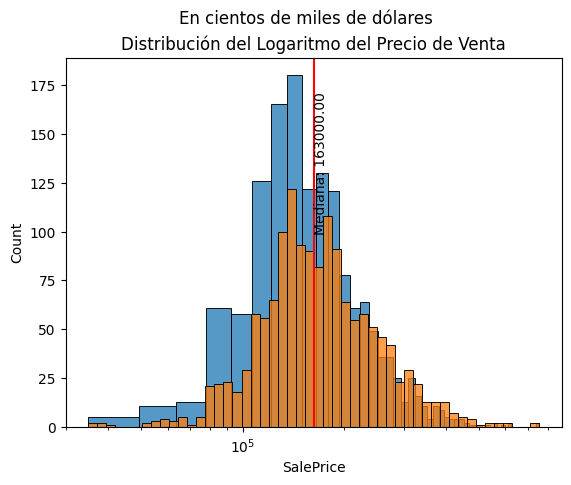

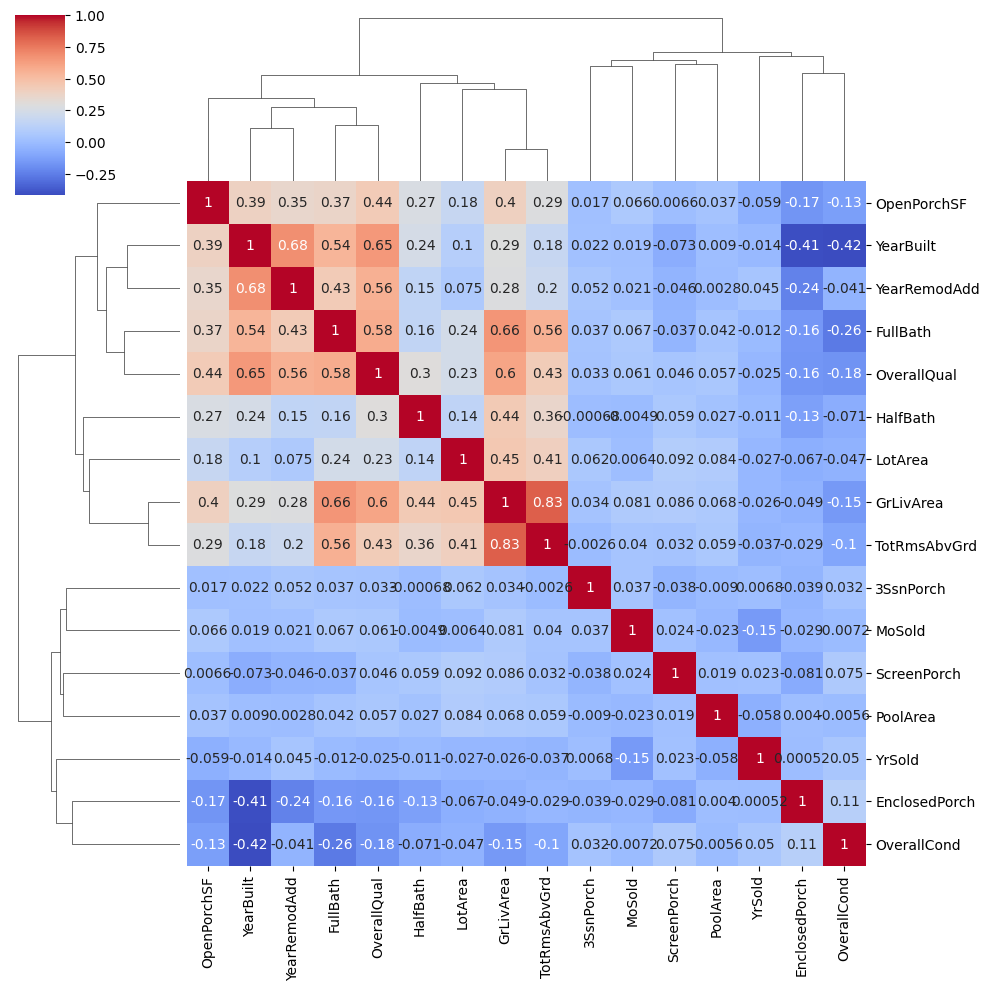

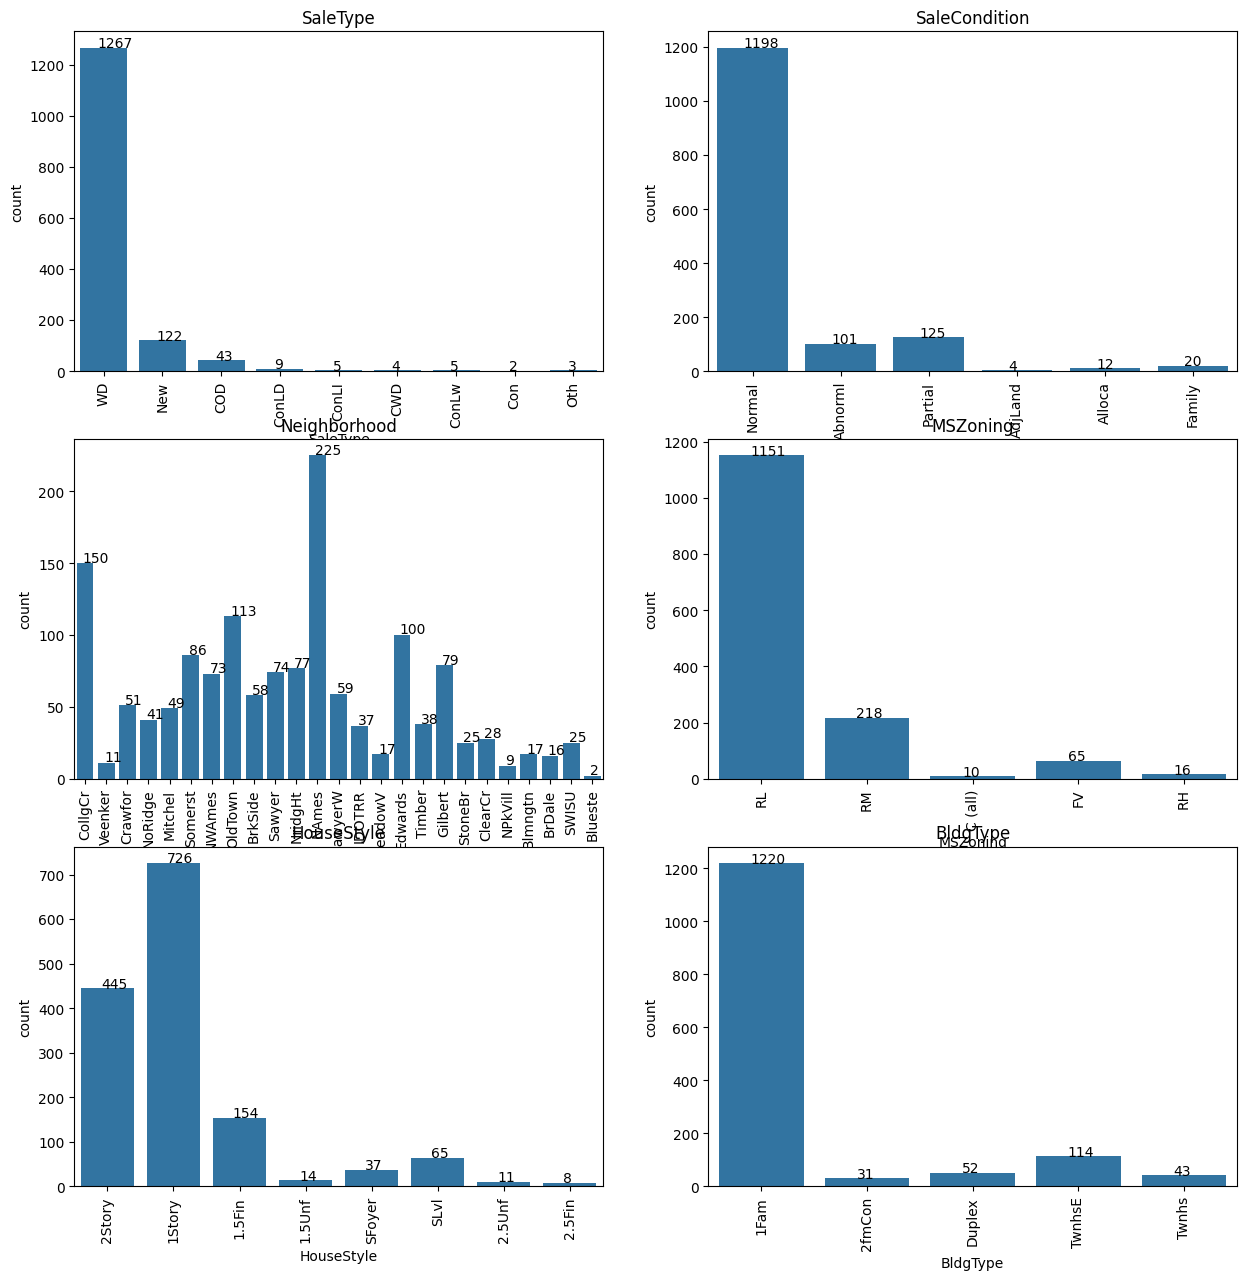

In [7]:
# Análisis exploratorio de datos (EDA)
# -------------------------
# Histograma del precio de venta
sns.histplot(data=df, x='SalePrice', bins=50)
plt.title('Distribución del Precio de Venta')
plt.suptitle('En cientos de miles de dólares')
median = df['SalePrice'].median()
plt.axvline(median, color='red')
plt.text(median + 0.01, 100, f'Mediana: {median:.2f}', rotation=90)

# Histograma del logaritmo del precio de venta
sns.histplot(data=df, x='SalePrice', bins=50, log_scale=True)
plt.title('Distribución del Logaritmo del Precio de Venta')
plt.suptitle('En cientos de miles de dólares')
plt.xscale('log')

# Matriz de correlación
colsnumeric = [
    'YearBuilt', 'YearRemodAdd', 
    'LotArea', 'GrLivArea', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'YrSold', 'MoSold',
    'FullBath',  'HalfBath', 'TotRmsAbvGrd',
    'PoolArea', 'OverallQual', 'OverallCond'
]
corr = df[colsnumeric].corr(method='spearman')
sns.clustermap(corr, annot=True, cmap='coolwarm')

# Gráficos de barras para las variables categóricas
cat_cols = [
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'HouseStyle', 'BldgType'
]
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i//2][i%2])
    for p in ax[i//2][i%2].patches:
        ax[i//2][i%2].annotate(f'{p.get_height():.0f}', (p.get_x() + 0.3, p.get_height() + 1))
    ax[i//2][i%2].set_title(col)
    ax[i//2][i%2].tick_params(axis='x', rotation=90)

# Correlación entre las variables numéricas y el precio de venta
df[colsnumeric + ['SalePrice']].corr(method='spearman')['SalePrice'].sort_values(ascending=False, key=np.abs)